In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:

##读取数据
a = pd.read_csv('../datas/breast-cancer-wisconsin.data', header=None)
print(a.head())
print(a.info())
# sys.exit(0)
# a = a.astype(np.int64)

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [5]:
###数据清洗
##缺失值的处理  1.删除这条（行）数据  2.填充 均值，0，众数，经验
a.replace('?', np.nan, inplace=True)
# a = a.replace('?',np.nan,inplace=False)
a = a.dropna()
a = a.astype(np.int64)  ###转换数据类型
# print(a.info())
# sys.exit()
X = a.iloc[:, 1:-1]
Y = a.iloc[:, -1]
print(Y.value_counts())
# print(X)
# sys.exit()

2    444
4    239
Name: 10, dtype: int64


In [6]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [7]:

logis = LogisticRegression()
"""
penalty='l2', 过拟合解决参数,l1正则或者l2正则 {'l1', 'l2', 'elasticnet', 'none'}, default='l2'；'newton-cg'、'sag' 和 'lbfgs' 求解器仅支持 l2 惩罚。'elasticnet' 仅由 'saga' 求解器支持。如果为“无”（不受 liblinear 求解器支持），则不应用正则化。
dual=False,
tol=1e-4, 梯度下降停止条件
C=1.0, 正则化强度的倒数；必须是正浮点数。较小的值指定更大的正则化
fit_intercept=True,
intercept_scaling=1,
class_weight=None, 类别权重，有助于解决数据类别不均衡的问题
random_state=None,
solver='liblinear',  参数优化方式，当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)，seg(minibatch),维度<10000时，lbfgs法比较好， 维度>10000时， cg法比较好，显卡计算的时候，lbfgs和cg都比seg快【nlbfgs和cg都是关于目标函数的二阶泰勒展开】
max_iter=100, 最多的迭代次数
multi_class='ovr', 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样；ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类；multinomial: many-vs-many（MVM）,即Softmax分类效果
verbose=0,
warm_start=False,
n_jobs=1
## Logistic回归是一种分类算法，不能应用于回归中(也即是说对于传入模型的y值来讲，不能是float类型，必须是int类型)
"""
logis.fit(x_train, y_train)

LogisticRegression()

0.9883040935672515 0.96484375


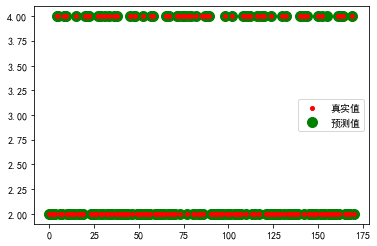

In [8]:

train_score = logis.score(x_train, y_train)
test_score = logis.score(x_test, y_test)
y_test_hat = logis.predict(x_test)
print(test_score, train_score)
plt.plot(range(len(x_test)), y_test, 'ro', markersize=4, zorder=3, label=u'真实值')
plt.plot(range(len(x_test)), y_test_hat, 'go', markersize=10, zorder=2, label=u'预测值')
plt.legend()
plt.show()